# Salary prediction notebook

### Introduction, objectives etc

In [36]:
import pandas as pd
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
df = pd.read_csv("Salary_Data.csv")
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


# EDA

## Univariate analysis

 Each category

- missing values?
- outliers?
- how many categories for "education"
- how mnay categories for "job title"
- distribution of years of experience? 

In [38]:
df.isna().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

In [39]:
df.describe()


,Age,Years of Experience,Salary
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


In [40]:
df['Age'].describe()

count    6702.000000
mean       33.620859
std         7.614633
min        21.000000
25%        28.000000
50%        32.000000
75%        38.000000
max        62.000000
Name: Age, dtype: float64

In [41]:
features_considered = ['Age', 'Years of Experience', 'Salary']
z_scores = zscore(df[features_considered], nan_policy = 'omit')
z_scores.head()

,Age,Years of Experience,Salary
0,-0.212877,-0.510797,-0.479839
1,-0.738221,-0.840909,-0.953483
2,1.494490,1.139763,0.656907
3,0.312467,-0.180685,-1.048212
4,2.413841,1.965043,1.604195


# Bivariate analysis

- Correlation between years of experience and salary
- scatterplots
- boxplots (all variables against salary and see if median is similar) 
    to understand what factors really affect salary
- categorical variables and their relationships
- how variables relate to salary

In [42]:
df["Job Title"].value_counts

<bound method IndexOpsMixin.value_counts of 0                           Software Engineer
1                                Data Analyst
2                              Senior Manager
3                             Sales Associate
4                                    Director
5                           Marketing Analyst
6                             Product Manager
7                               Sales Manager
8                       Marketing Coordinator
9                            Senior Scientist
10                         Software Developer
11                                 HR Manager
12                          Financial Analyst
13                            Project Manager
14                       Customer Service Rep
15                         Operations Manager
16                          Marketing Manager
17                            Senior Engineer
18                           Data Entry Clerk
19                             Sales Director
20                           Busines

In [43]:
unique_values = df['Job Title'].unique()

print(unique_values)

['Software Engineer' 'Data Analyst' 'Senior Manager' 'Sales Associate'
 'Director' 'Marketing Analyst' 'Product Manager' 'Sales Manager'
 'Marketing Coordinator' 'Senior Scientist' 'Software Developer'
 'HR Manager' 'Financial Analyst' 'Project Manager' 'Customer Service Rep'
 'Operations Manager' 'Marketing Manager' 'Senior Engineer'
 'Data Entry Clerk' 'Sales Director' 'Business Analyst' 'VP of Operations'
 'IT Support' 'Recruiter' 'Financial Manager' 'Social Media Specialist'
 'Software Manager' 'Junior Developer' 'Senior Consultant'
 'Product Designer' 'CEO' 'Accountant' 'Data Scientist'
 'Marketing Specialist' 'Technical Writer' 'HR Generalist'
 'Project Engineer' 'Customer Success Rep' 'Sales Executive' 'UX Designer'
 'Operations Director' 'Network Engineer' 'Administrative Assistant'
 'Strategy Consultant' 'Copywriter' 'Account Manager'
 'Director of Marketing' 'Help Desk Analyst' 'Customer Service Manager'
 'Business Intelligence Analyst' 'Event Coordinator' 'VP of Finance'
 'G

In [44]:
to_read = open("Non_CS_Jobs.txt")
Non_CS_Jobs = []
while(True):
    content = to_read.readline()
    if not content:
        break
    content = content.strip()
    Non_CS_Jobs.append(content[1: (len(content) - 1)])

    print(content[1: (len(content) - 1)])


€˜Sales Associateâ€
€˜Directorâ€
€˜Marketing Analystâ€
€˜Product Managerâ€
€˜Sales Managerâ€
€˜Marketing Coordinatorâ€
€˜Senior Scientistâ€
€˜HR Managerâ€
€˜Financial Analyst
Project Manager
Customer Service Rep
Operations Manager
Marketing Manager
€˜Senior Engineerâ€
Sales Director
Business Analyst
VP of Operation
Recruiter
Financial Manager
Social Media Specialist
€˜Senior Consultantâ€
Product Designer
CEO
Accountant
Marketing Specialist
Technical Writer
HR Generalist
Project Engineer
Customer Success Rep
Sales Executive
Operations Director
Administrative Assistant
Strategy Consultant
Copywriter
Account Manager
Director of Marketing
Customer Service Manager
Business Intelligence Analyst
Event Coordinator
VP of Finance
Graphic Designer
Social Media Manager
Director of Operations
Junior Accountant
Digital Marketing Manager
Customer Service Representative
Business Development Manager
Senior Financial Analyst
Research Director
Creative Director
Human Resources Director
Content Marketing

Filtering out non CS jobs 

In [45]:
print(len(df.index))
mask = ~df['Job Title'].isin(Non_CS_Jobs)

# Filter the DataFrame using the mask
filtered_df = df[mask]

print(len(filtered_df.index))
filtered_df.head


6704
4422


<bound method NDFrame.head of        Age  Gender    Education Level                     Job Title  \
0     32.0    Male         Bachelor's             Software Engineer   
1     28.0  Female           Master's                  Data Analyst   
2     45.0    Male                PhD                Senior Manager   
3     36.0  Female         Bachelor's               Sales Associate   
4     52.0    Male           Master's                      Director   
5     29.0    Male         Bachelor's             Marketing Analyst   
6     42.0  Female           Master's               Product Manager   
7     31.0    Male         Bachelor's                 Sales Manager   
8     26.0  Female         Bachelor's         Marketing Coordinator   
9     38.0    Male                PhD              Senior Scientist   
10    29.0    Male           Master's            Software Developer   
11    48.0  Female         Bachelor's                    HR Manager   
12    35.0    Male         Bachelor's          

Filtering out null values

In [46]:
print(len(filtered_df.index))
filtered_df = filtered_df.dropna(subset = ['Gender']).reset_index(drop = True)
filtered_df = filtered_df.dropna(subset = ['Education Level']).reset_index(drop = True)
filtered_df = filtered_df.dropna(subset = ['Job Title']).reset_index(drop = True)
filtered_df = filtered_df.dropna(subset = ['Salary']).reset_index(drop = True)

filtered_df.isna().sum()[filtered_df.isna().sum()>0]

print(len(filtered_df.index))
filtered_df.isna().sum()

#there are 0 negative salaries in the dataset, or all salaries are valid
condition = filtered_df['Salary'] < 0
count = condition.sum()
print(count)


4422
4418
0


Checking Years of Experience

In [47]:
years_condition = filtered_df['Years of Experience'] < 0
years_count = years_condition.sum()
print(years_count)


0


Checking Age

In [48]:
age_condition = filtered_df['Age'] < 0
age_count = age_condition.sum()
print(age_count)

0


In [49]:
filtered_df["Education Level"].value_counts

<bound method IndexOpsMixin.value_counts of 0              Bachelor's
1                Master's
2                     PhD
3              Bachelor's
4                Master's
5              Bachelor's
6                Master's
7              Bachelor's
8              Bachelor's
9                     PhD
10               Master's
11             Bachelor's
12             Bachelor's
13                    PhD
14             Bachelor's
15               Master's
16             Bachelor's
17               Master's
18             Bachelor's
19                    PhD
20               Master's
21                    PhD
22               Master's
23             Bachelor's
24                    PhD
25             Bachelor's
26             Bachelor's
27               Master's
28                    PhD
29               Master's
30             Bachelor's
31             Bachelor's
32                    PhD
33             Bachelor's
34             Bachelor's
35             Bachelor's
36               Mas

Making Education Levels uniform 

In [50]:
edu_unique_values = filtered_df['Education Level'].unique()

print(edu_unique_values)

filtered_df['Education Level'].replace('Bachelor\'s Degree', 'Bachelor\'s', inplace=True)
filtered_df['Education Level'].replace('Master\'s Degree', 'Master\'s', inplace=True)
filtered_df['Education Level'].replace('phD', 'PhD', inplace=True)
edu_unique_values = filtered_df['Education Level'].unique()

print(edu_unique_values)

["Bachelor's" "Master's" 'PhD' "Bachelor's Degree" "Master's Degree"
 'High School' 'phD']
["Bachelor's" "Master's" 'PhD' 'High School']


In [51]:
filtered_df["Gender"].value_counts


filtered_df = filtered_df.drop(filtered_df[filtered_df['Gender'] == 'Other'].index)
gen_unique_values = filtered_df['Gender'].unique()
print(gen_unique_values)

['Male' 'Female']


# Data preprocessing

- Treat out null values
- Treat outliers
- one-hot encode our categorical columns (gender, education, job title)
- 

Dropping Duplicates
Do we need to drop duplicates? There seems to be many (could be different people with identical data?)

In [52]:
# For investigating duplicates
#filtered_df
#filtered_df.sort_values(['Age','Salary'])

In [53]:
# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Now print the entire DataFrame
#print(filtered_df)

Is 55 duplicates enough to warrant filtering out duplicates?

In [54]:

print(len(filtered_df.index))
indices = []
mydict = {}
for index, row in filtered_df.iterrows():
    a = [row['Age'], row['Gender'], row['Education Level'], row['Years of Experience'], row['Salary']]
    a = tuple(a)
    if a in mydict:
        mydict[a] += 1
        #print(a)
        #print(index)
        indices.append(index)
        #print("HELLO")
    else:
        mydict[a] = 1
print(len(indices))
for i in indices:
    filtered_df.drop(i, inplace = True)

sum = 0
for i in mydict.values():
    if i > 1:
        sum += i - 1

#print(len(indices))
print(len(filtered_df.index))


4404
3384


1020


In [71]:

top_five_jobs = filtered_df['Job Title'].value_counts()[:].index.tolist()
print(top_five_jobs)
mask = filtered_df['Job Title'].isin(top_five_jobs)

# Filter the DataFrame using the mask
top_five_jobs_df = filtered_df[mask]
#top_five_jobs_df

['Software Engineer Manager', 'Full Stack Engineer', 'Senior Software Engineer', 'Senior Project Engineer', 'Data Scientist', 'Back end Developer', 'Software Engineer', 'Front end Developer', 'Data Analyst', 'Product Manager', 'Web Developer', 'Marketing Coordinator', 'Sales Manager', 'Software Developer', 'Sales Associate', 'Junior Web Developer', 'Senior Data Scientist', 'Marketing Analyst', 'Financial Analyst', 'Junior Software Developer', 'Junior Software Engineer', 'Director of Data Science', 'Front End Developer', 'Senior Software Developer', 'Senior Scientist', 'Senior Data Analyst', 'Senior Manager', 'HR Manager', 'Senior Data Engineer', 'Senior UX Designer', 'Senior Engineer', 'Junior Data Analyst', 'Junior Designer', 'Senior Software Architect', 'Junior Developer', 'Senior Consultant', 'UX Designer', 'Network Engineer', 'Help Desk Analyst', 'UX Researcher', 'Director', 'IT Manager', 'VP of Operations', 'Technical Support Specialist', 'Senior IT Consultant', 'Chief Data Office

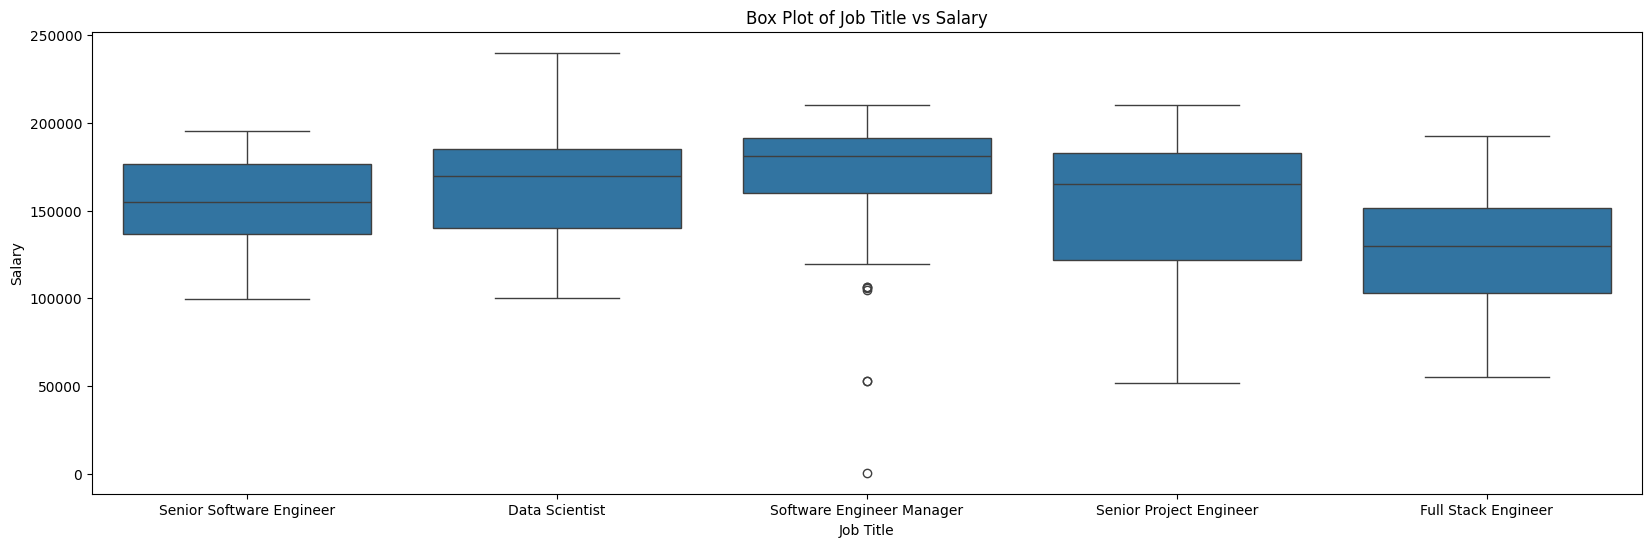

In [56]:
plt.figure(figsize=(20, 6))
sns.boxplot(x='Job Title', y='Salary', data=top_five_jobs_df)
plt.title('Box Plot of Job Title vs Salary')
plt.xlabel('Job Title')
plt.ylabel('Salary')
plt.show()

In [57]:
#one_hot_encoded_data = pd.get_dummies(filtered_df,  dtype=int, columns = ['Education Level', 'Gender', 'Job Title'])
#print(one_hot_encoded_data.head())

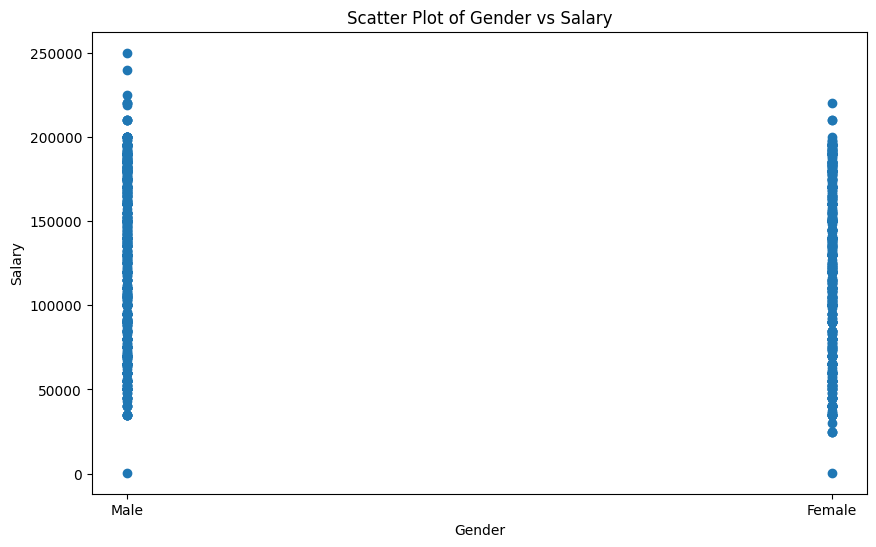

In [58]:



plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['Gender'], filtered_df['Salary'])
plt.title('Scatter Plot of Gender vs Salary')
plt.xlabel('Gender')
plt.ylabel('Salary')
plt.show()

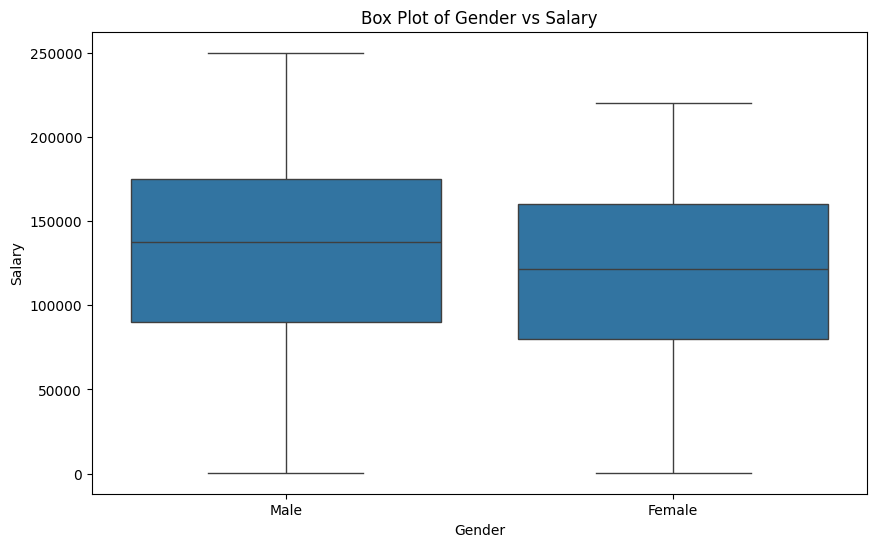

In [59]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Salary', data=filtered_df)
plt.title('Box Plot of Gender vs Salary')
plt.xlabel('Gender')
plt.ylabel('Salary')
plt.show()

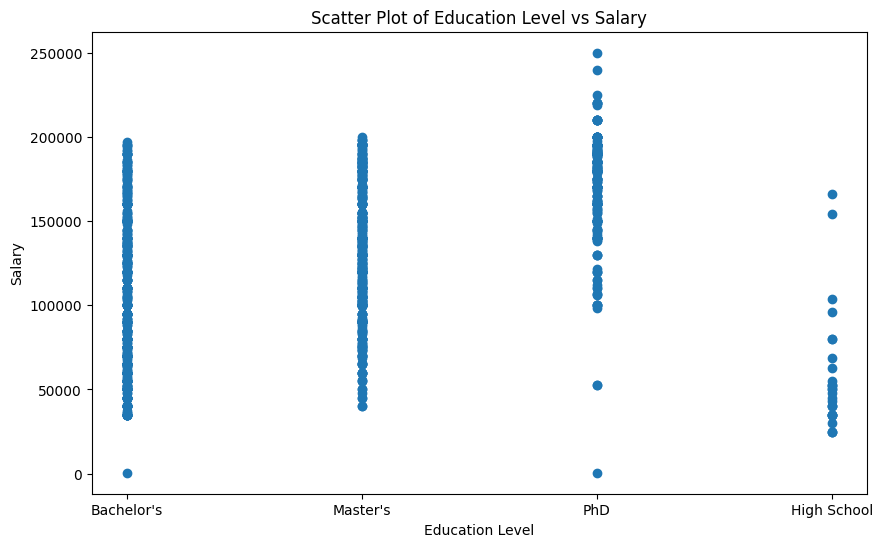

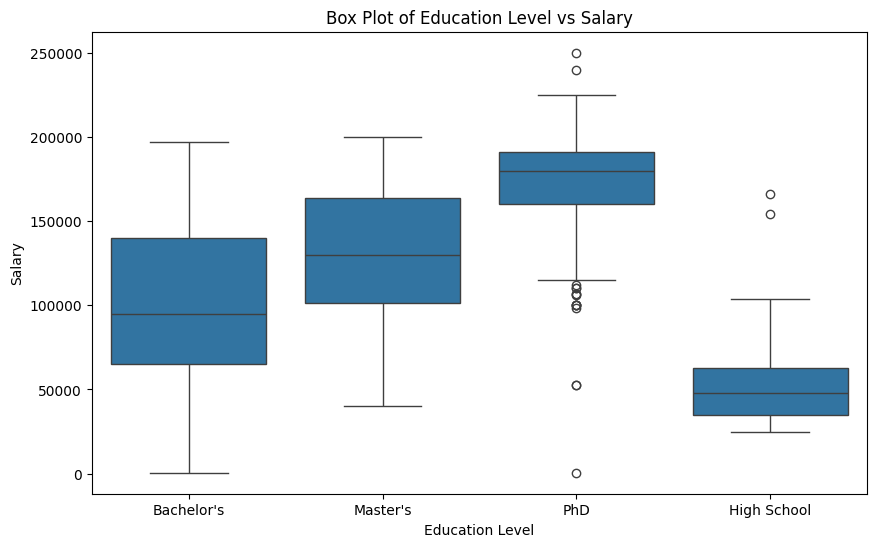

In [60]:

plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['Education Level'], filtered_df['Salary'])
plt.title('Scatter Plot of Education Level vs Salary')
plt.xlabel('Education Level')
plt.ylabel('Salary')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Education Level', y='Salary', data=filtered_df)
plt.title('Box Plot of Education Level vs Salary')
plt.xlabel('Education Level')
plt.ylabel('Salary')
plt.show()

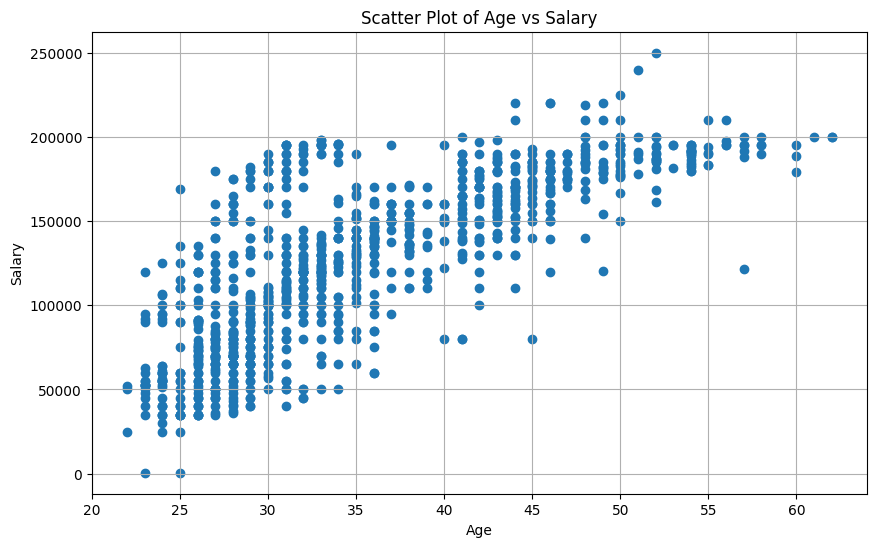

In [61]:

plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['Age'], filtered_df['Salary'])
plt.title('Scatter Plot of Age vs Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

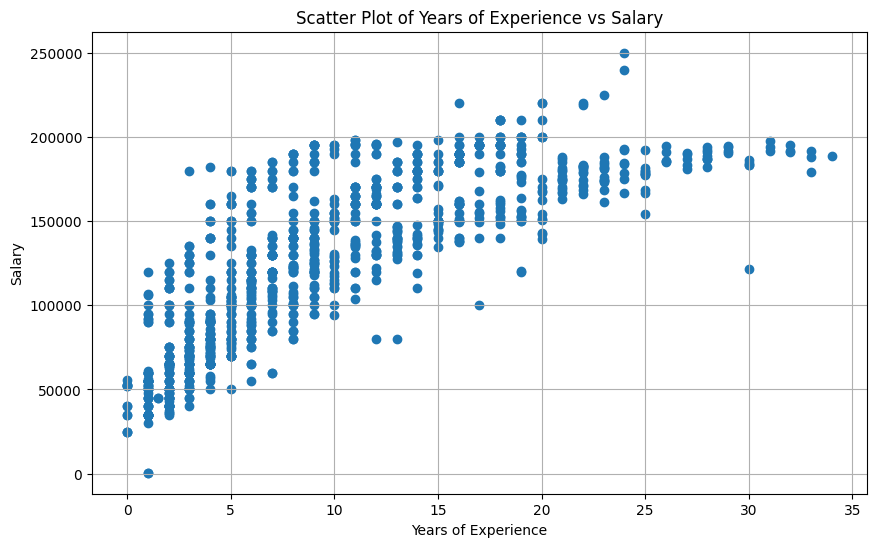

In [62]:

plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['Years of Experience'], filtered_df['Salary'])
plt.title('Scatter Plot of Years of Experience vs Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

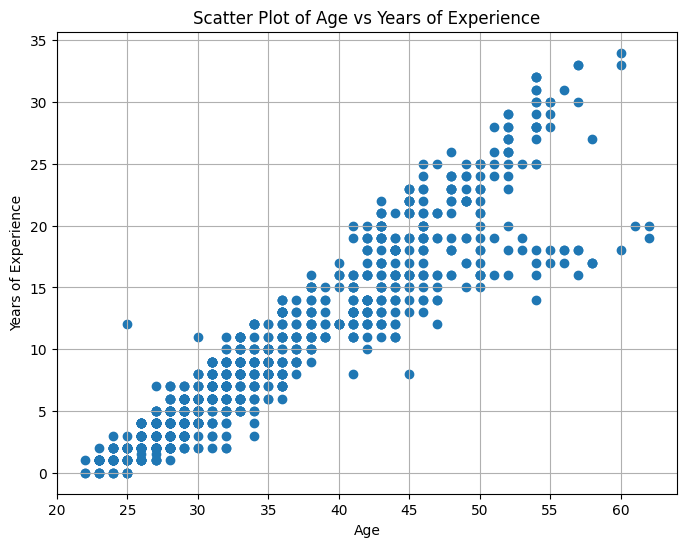

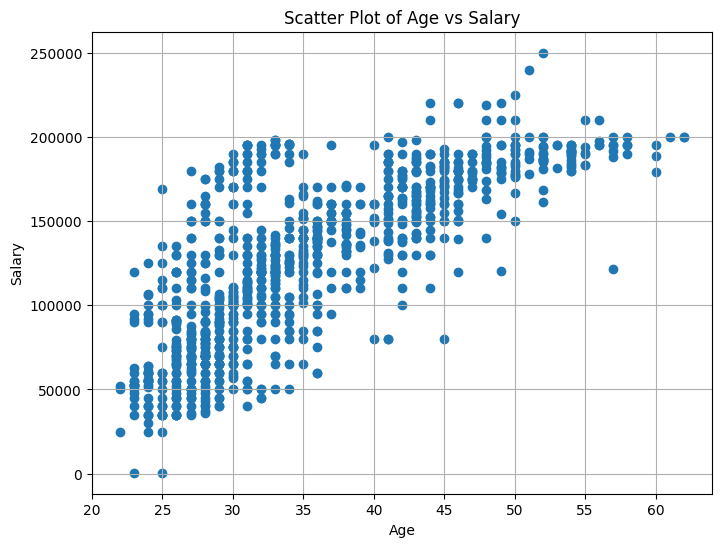

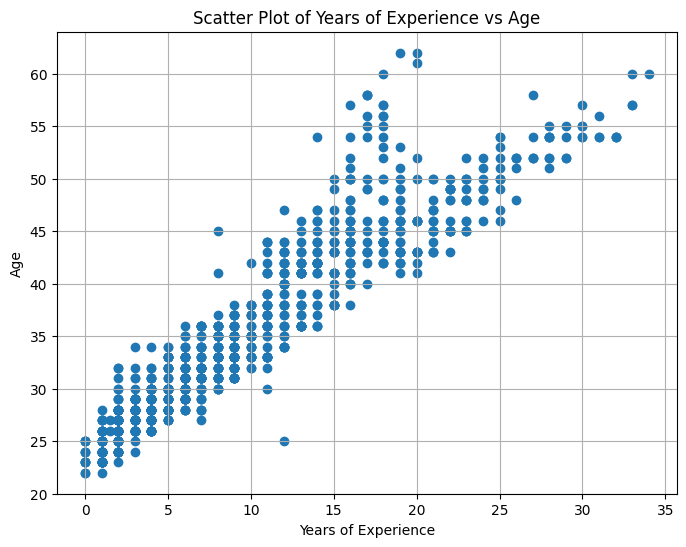

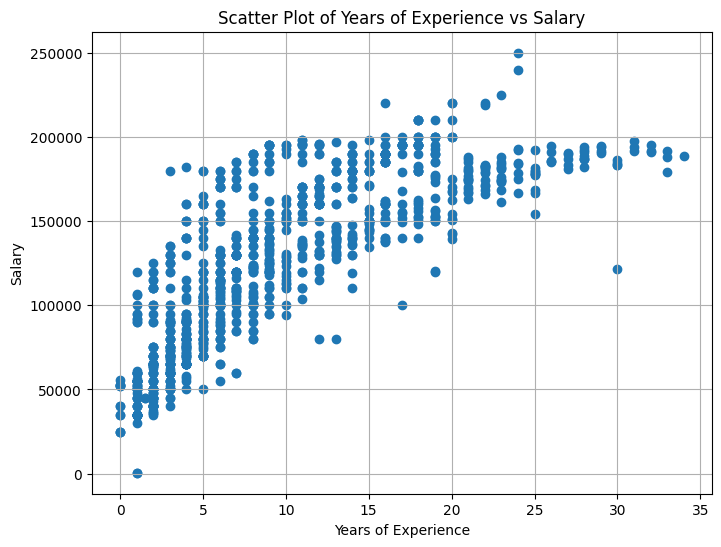

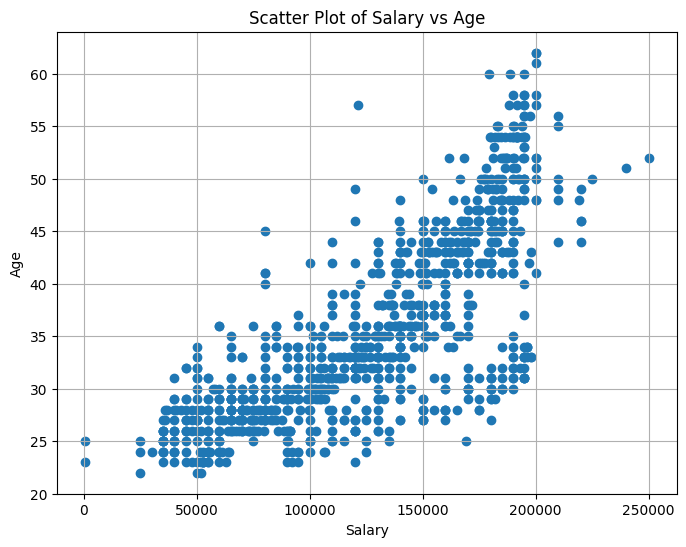

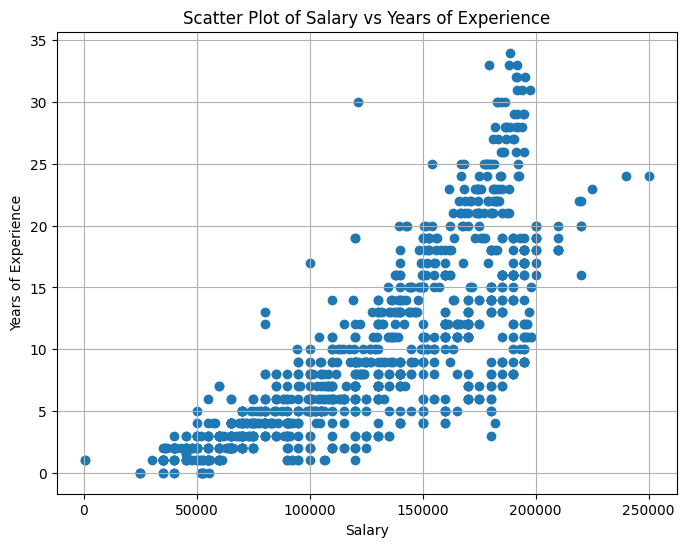

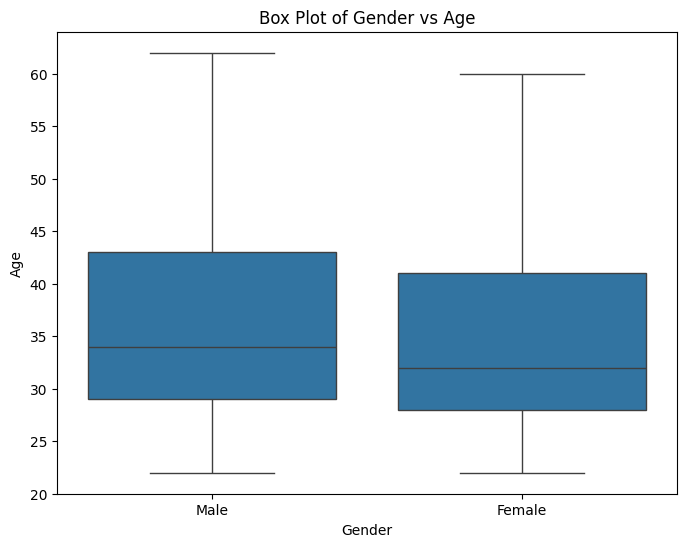

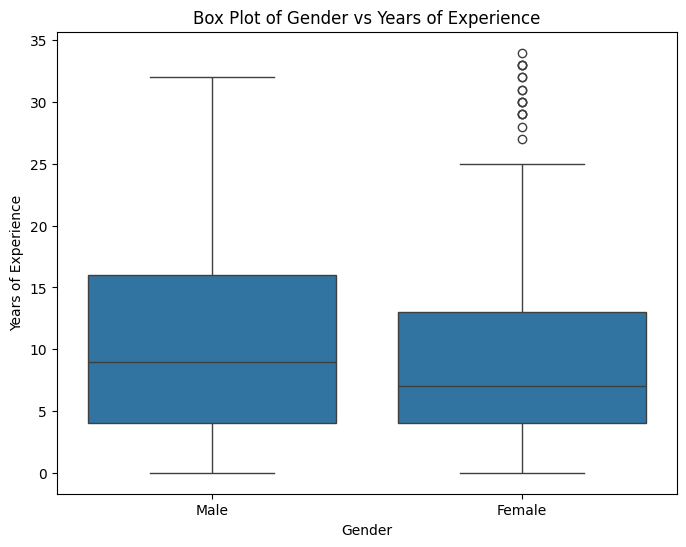

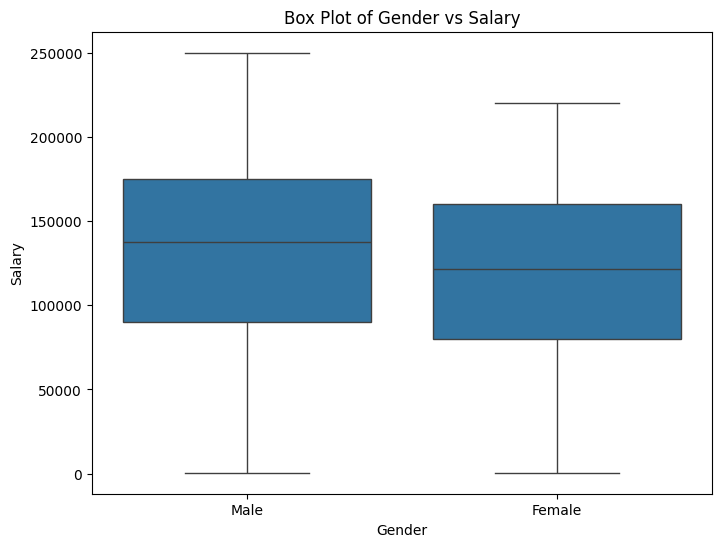

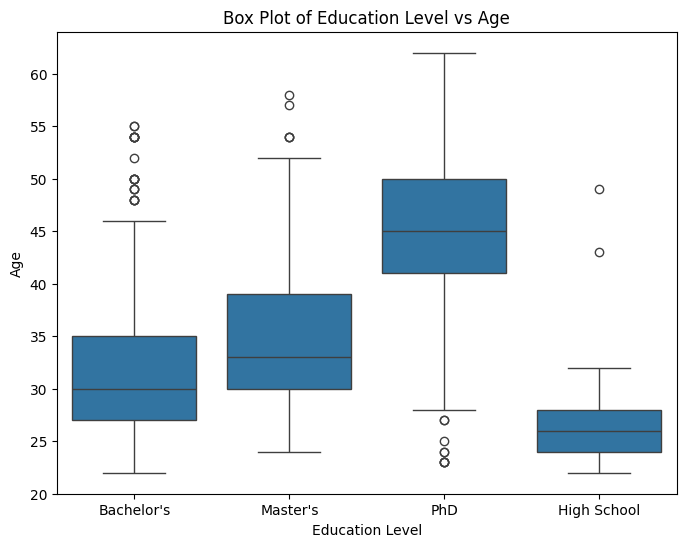

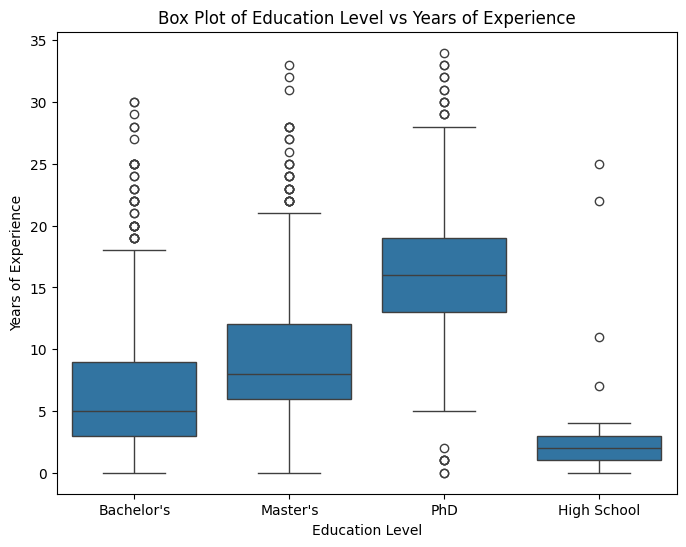

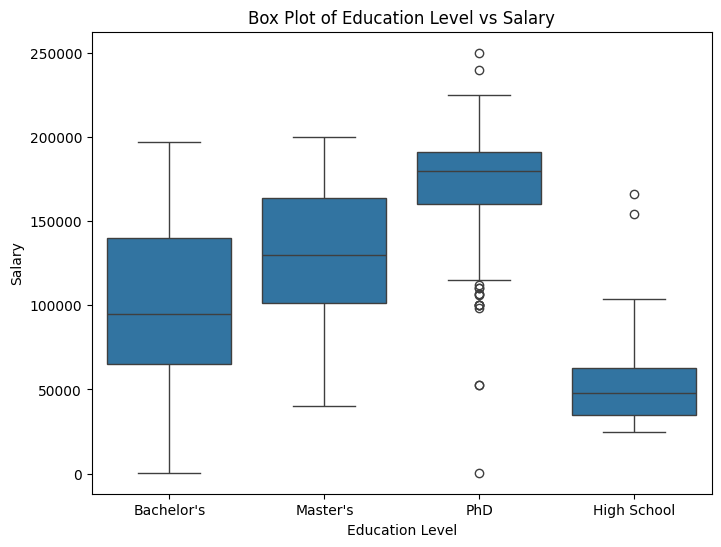

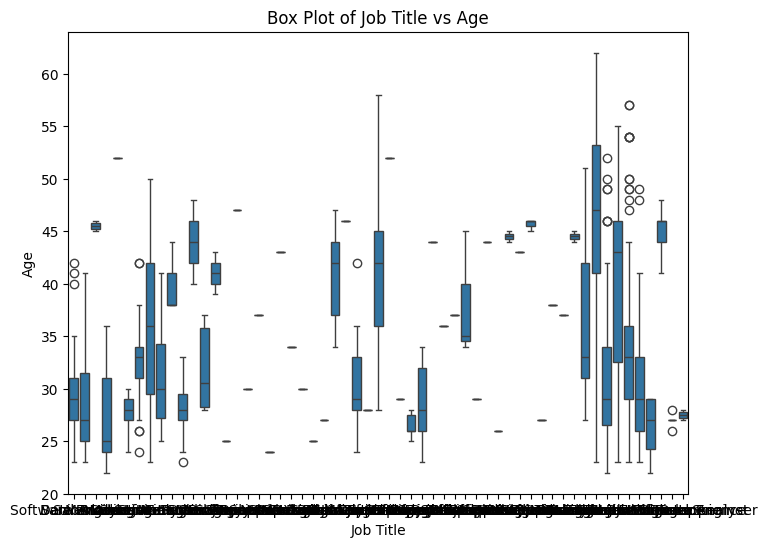

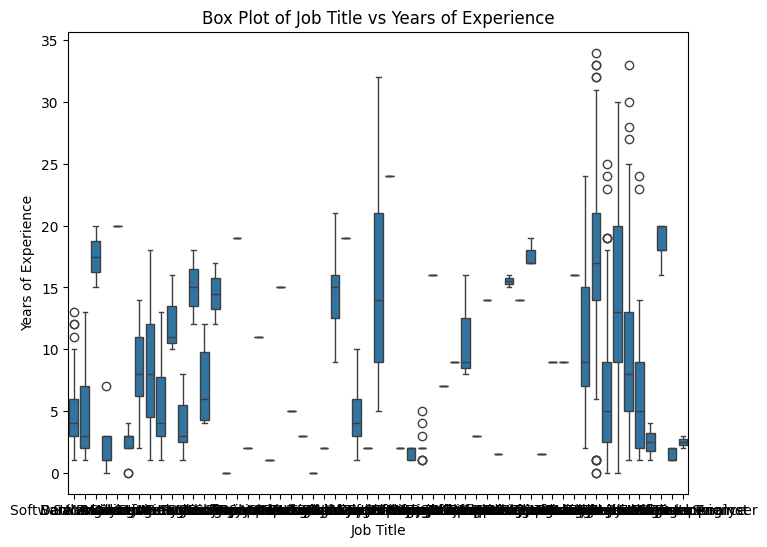

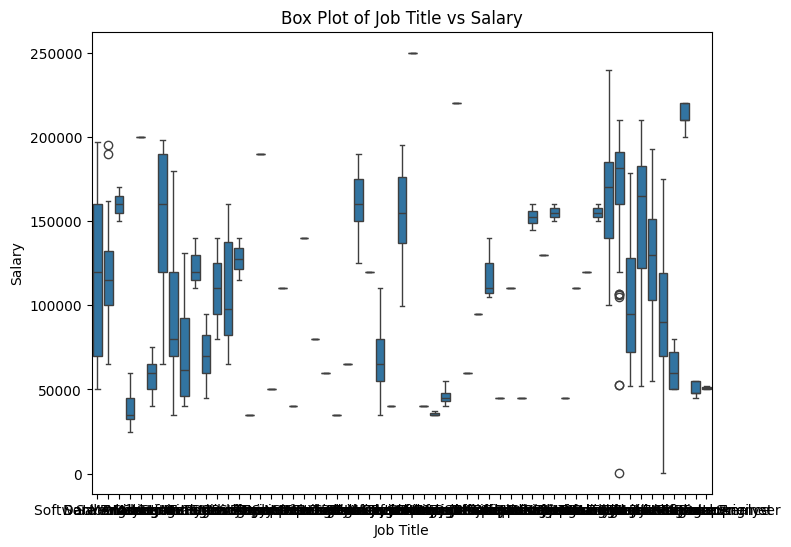

In [63]:
def plot_all_variables(df):
    numeric_vars = df.select_dtypes(include=['int', 'float']).columns
    categorical_vars = df.select_dtypes(include=['object']).columns


    for i, numeric_var1 in enumerate(numeric_vars):
        for j, numeric_var2 in enumerate(numeric_vars):
            if i != j:
                plt.figure(figsize=(8, 6))
                plt.scatter(df[numeric_var1], df[numeric_var2])
                plt.title(f'Scatter Plot of {numeric_var1} vs {numeric_var2}')
                plt.xlabel(numeric_var1)
                plt.ylabel(numeric_var2)
                plt.grid(True)
                plt.show()

    
    for categorical_var in categorical_vars:
        for numeric_var in numeric_vars:
            plt.figure(figsize=(8, 6))
            sns.boxplot(x=categorical_var, y=numeric_var, data=df)
            plt.title(f'Box Plot of {categorical_var} vs {numeric_var}')
            plt.xlabel(categorical_var)
            plt.ylabel(numeric_var)
            plt.show()


plot_all_variables(filtered_df)

<Figure size 1000x600 with 0 Axes>

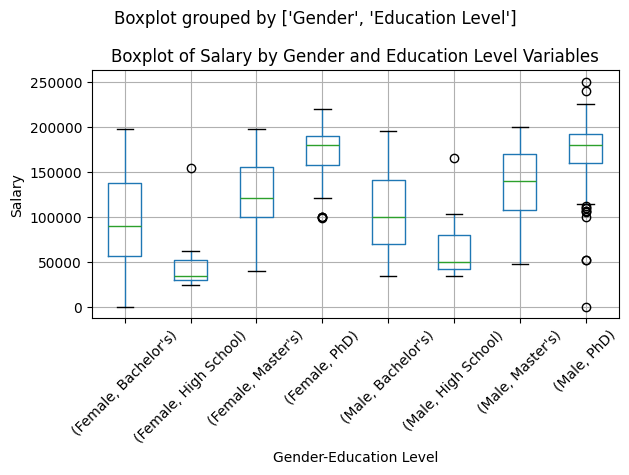

In [64]:

plt.figure(figsize=(10, 6))
filtered_df.boxplot(column='Salary', by=['Gender', 'Education Level'])


plt.xlabel('Gender-Education Level')
plt.ylabel('Salary')
plt.title('Boxplot of Salary by Gender and Education Level Variables')


plt.xticks(rotation=45)


plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

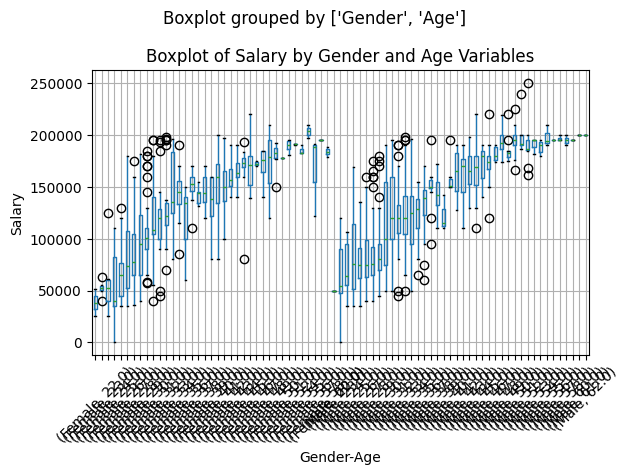

In [65]:

plt.figure(figsize=(10, 6))
filtered_df.boxplot(column='Salary', by=['Gender', 'Age'])


plt.xlabel('Gender-Age')
plt.ylabel('Salary')
plt.title('Boxplot of Salary by Gender and Age Variables')


plt.xticks(rotation=45)


plt.tight_layout()
plt.show()

In [66]:
filtered_df.to_csv('Processed_Data.csv')

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

In [68]:
X = filtered_df.drop('Salary', axis = 1)
Y = filtered_df['Salary']


numeric_features = ['Age', 'Years of Experience']
categorical_features = ['Gender', 'Education Level', 'Job Title']

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features), ('cat', categorical_transformer, categorical_features)])

In [69]:
import pickle
lmd = [0.1]
accuracy = []

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=42)

for i in lmd:
    
    lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),('regressor', Ridge(alpha = i))])

    
    lr_pipeline.fit(X_train, y_train)

    accuracy.append(np.mean(cross_val_score(lr_pipeline, X_train, y_train, cv=5)))
    
 
    y_pred = lr_pipeline.predict(X_test)


    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f'RMSE: {rmse:.2f}')
    print(f'R^2: {r2:.2f}')

for i in accuracy:
    print("accuracy of model on unforseen data:",i)

sample = pd.DataFrame
with open("linear_regression_model.pkl","wb") as f:
    pickle.dump(lr_pipeline, f)

RMSE: 19857.32
R^2: 0.85
accuracy of model on unforseen data: 0.7801677895037396


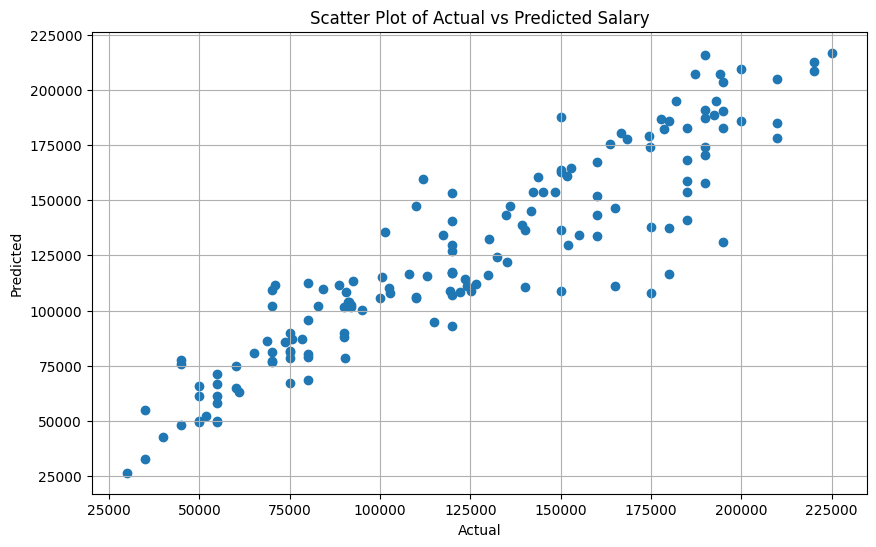

In [70]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.title('Scatter Plot of Actual vs Predicted Salary')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(True)
plt.show()